In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # don't print out warnings

# 探索的分析

In [2]:
data = pd.read_csv("data.csv", encoding="shift-jis")
print("sample number:\t\t", data.shape[0])
print("variable number:\t", data.shape[1])

sample number:		 776
variable number:	 17


- rent	:	家賃（月当たり，円）
- arrival_time	:	バス乗車時間（最寄り駅から，分）
- walk_time	:	徒歩時間（最寄り駅または最寄りバス停から，分）
- deposit_key_mony	:	敷金礼金（合計月数）
- exclusive_area	:	専有面積（平方メートル）
- building_age	:	築年数（年）
- is_second_floor	:	部屋は１階か２階か（0：１階，１：２階）
- have_air_conditioned	:	空調の有無（0：無，1：有）
- have_storage	:	収納の有無（0：無，1：有）
- have_flooring	:	フローリングの有無（0：無，1：有）
- hava_balcony	:	バルコニーの有無（0：無，1：有）
- time_to_shinjyuku	:	新宿からの列車時間（分）
- transfer_num	:	乗換路線数
- from_express_train_num	:	急行停車駅からの駅数
- fare	:	運賃（新宿からの片道運賃，円）
- distance_to_shinjyuku	:	新宿からの距離（km）
- station_name	:	駅名

In [3]:
def missing_value_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100*mis_val/len(df)
    table = pd.DataFrame({'mis_val': mis_val, 'percent': mis_val_percent})
    table = table[table.iloc[:, 1] != 0]
    if table.shape[0] == 0:
        print("no missing value")
    else:
        return table

In [4]:
missing_value_table(data)

no missing value


In [5]:
def feature_summary(df_fa):
    print('DataFrame shape')
    print('rows: ', df_fa.shape[0])
    print('cols: ', df_fa.shape[1])
    col_list = ['Null', 'Unique_Count', 'Data_type', 'Mean', 'Median', 'Std', 'Skewness', 'Sample_values']
    df = pd.DataFrame(index=df_fa.columns, columns=col_list)
    
    df['Null'] = list([len(df_fa[col][df_fa[col].isnull()]) for i, col in enumerate(df_fa.columns)])
    df['Unique_Count'] = list([len(df_fa[col].unique()) for i, col in enumerate(df_fa.columns)])
    df['Data_type'] = list([df_fa[col].dtype for i, col in enumerate(df_fa.columns)])
    
    for i, col in enumerate(df_fa.columns):
        if 'float' in str(df_fa[col].dtype) or 'int' in str(df_fa[col].dtype):
            df.at[col, 'Mean'] = df_fa[col].mean()
            df.at[col, 'Median'] = df_fa[col].median()
            df.at[col, 'Std'] = df_fa[col].std()
            df.at[col, 'Skewness'] = df_fa[col].skew()
        df.at[col, 'Sample_values'] = list(df_fa[col].unique())
    return df.fillna('-')

In [6]:
feature_summary(data)

DataFrame shape
rows:  776
cols:  17


,Null,Unique_Count,Data_type,Mean,Median,Std,Skewness,Sample_values
rent,0,117,int64,70236.8,67250,19910.6,2.29561,"[70000, 79000, 90000, 96000, 98000, 65000, 800..."
arrival_time,0,8,int64,0.248711,0,1.91396,8.43602,"[0, 8, 15, 13, 6, 10, 14, 20]"
walk_time,0,20,int64,7.40335,7,3.95764,0.615889,"[1, 6, 5, 2, 7, 8, 4, 3, 10, 9, 13, 15, 11, 12..."
deposit_key_mony,0,10,float64,3.3607,4,0.875878,-0.802297,"[4.0, 5.0, 3.0, 6.0, 2.0, 4.5, 1.0, 0.0, 0.4, ..."
exclusive_area,0,373,float64,20.4244,19.8,4.96211,2.04852,"[16.42, 19.68, 19.0, 19.44, 18.23, 22.88, 18.6..."
building_age,0,24,int64,6.01546,6,4.10504,0.939394,"[10, 7, 6, 0, 11, 8, 4, 9, 2, 12, 3, 1, 21, 5,..."
is_second_floor,0,2,int64,0.635309,1,0.481654,-0.563305,"[0, 1]"
have_air_conditioned,0,2,int64,0.796392,1,0.402941,-1.47494,"[0, 1]"
have_storage,0,2,int64,0.765464,1,0.423982,-1.25548,"[0, 1]"
have_flooring,0,2,int64,0.447165,0,0.497521,0.212942,"[0, 1]"


In [7]:
corr_mat = data.corr(method='pearson')
corr_mat

,rent,arrival_time,walk_time,deposit_key_mony,exclusive_area,building_age,is_second_floor,have_air_conditioned,have_storage,have_flooring,hava_balcony,time_to_shinjyuku,transfer_num,from_express_train_num,fare,distance_to_shinjyuku
rent,1.000000,-0.134616,-0.265897,0.438335,0.689117,-0.250403,0.155427,0.217367,0.172980,0.241964,0.183850,-0.535027,0.049291,-0.014934,-0.526469,-0.529395
arrival_time,-0.134616,1.000000,-0.181051,-0.067437,-0.003939,0.023487,0.041130,-0.032966,-0.007528,-0.045127,-0.013369,0.167264,0.089804,-0.073184,0.184697,0.177106
walk_time,-0.265897,-0.181051,1.000000,-0.194679,-0.040638,0.079038,-0.020884,-0.115116,-0.058127,-0.045192,-0.073971,0.227733,0.032919,-0.009893,0.224475,0.230612
deposit_key_mony,0.438335,-0.067437,-0.194679,1.000000,0.198821,-0.195307,0.021951,0.091365,0.123859,0.141355,0.137580,-0.376910,0.150422,0.004252,-0.362963,-0.373899
exclusive_area,0.689117,-0.003939,-0.040638,0.198821,1.000000,-0.083995,0.045458,0.008969,0.187598,0.110232,0.096138,-0.104452,0.034123,0.026196,-0.115364,-0.110175
building_age,-0.250403,0.023487,0.079038,-0.195307,-0.083995,1.000000,0.078557,-0.364732,-0.073533,-0.436163,-0.068842,0.025016,0.049233,-0.019701,0.027180,0.033781
is_second_floor,0.155427,0.041130,-0.020884,0.021951,0.045458,0.078557,1.000000,0.022464,0.016594,0.013718,0.288343,-0.046967,0.130550,-0.102400,-0.026430,-0.030220
have_air_conditioned,0.217367,-0.032966,-0.115116,0.091365,0.008969,-0.364732,0.022464,1.000000,0.007125,0.274527,0.101254,-0.112370,-0.056790,0.025495,-0.123869,-0.118686
have_storage,0.172980,-0.007528,-0.058127,0.123859,0.187598,-0.073533,0.016594,0.007125,1.000000,0.149157,0.051482,-0.186048,-0.049448,0.016525,-0.189234,-0.188569
have_flooring,0.241964,-0.045127,-0.045192,0.141355,0.110232,-0.436163,0.013718,0.274527,0.149157,1.000000,0.085301,-0.191263,-0.064286,0.029313,-0.189516,-0.191966


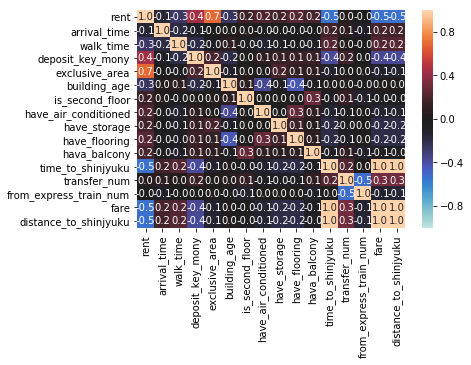

In [8]:
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

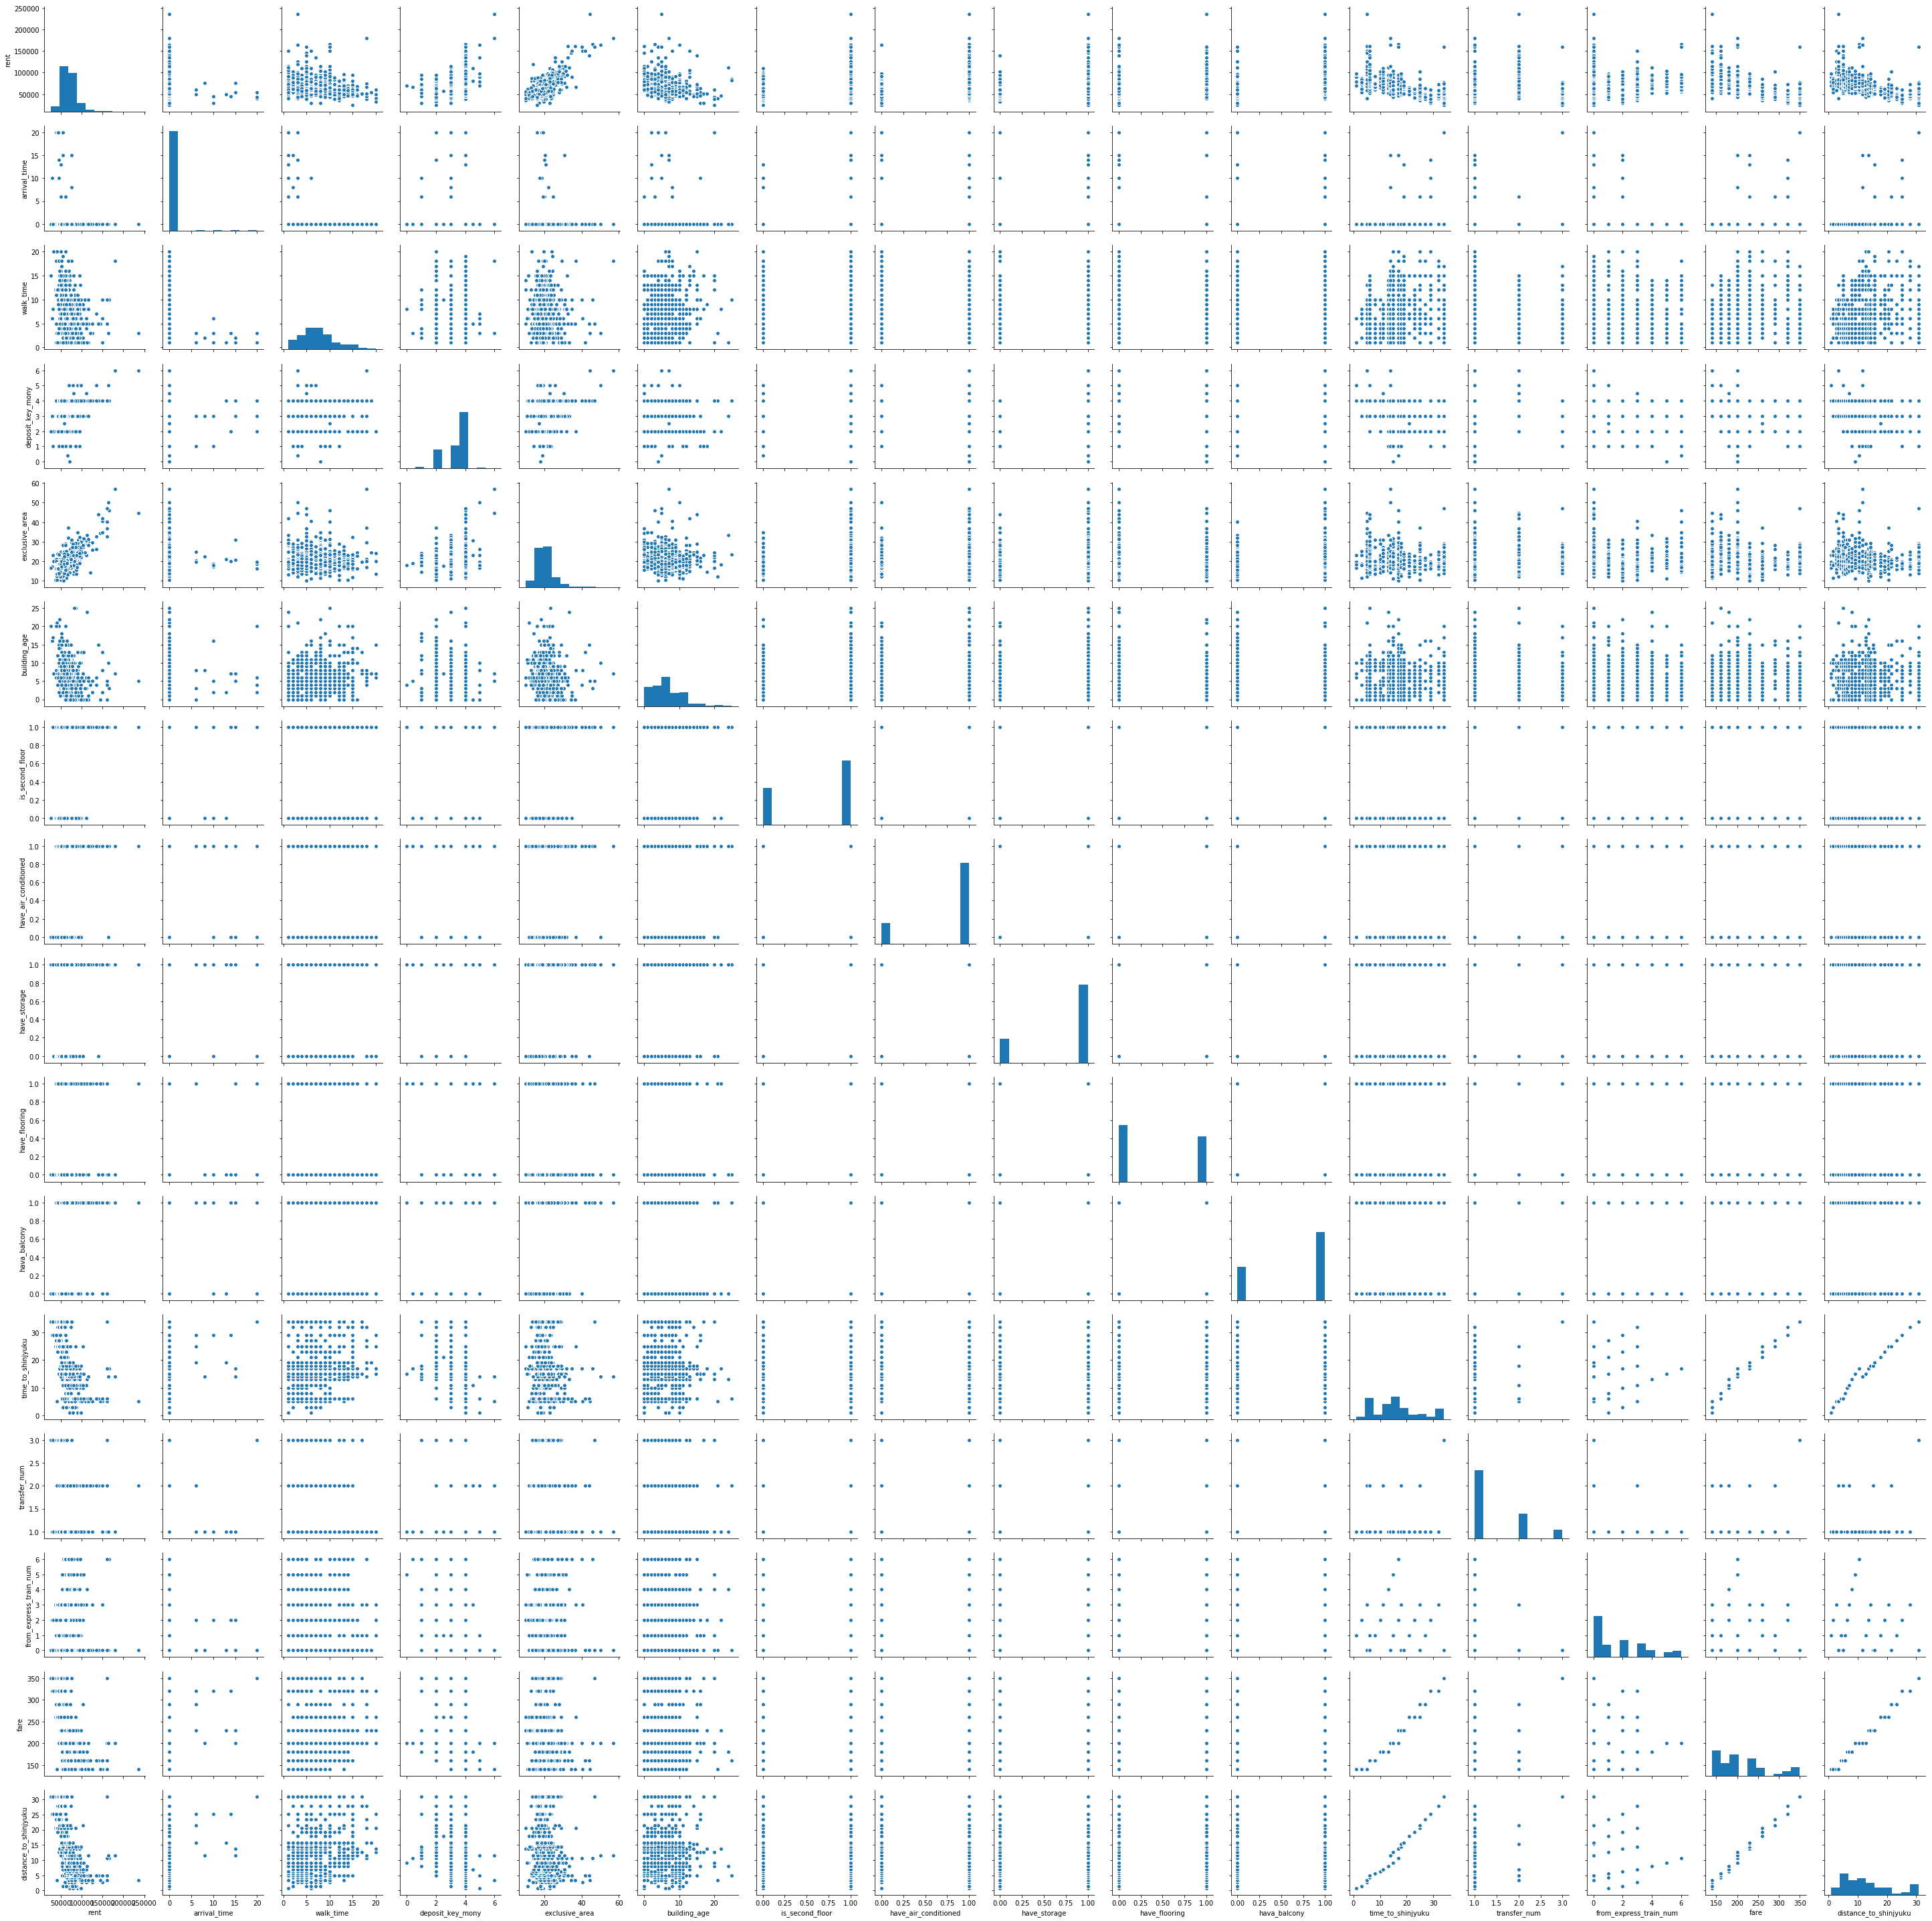

In [9]:
sns.pairplot(data)
plt.show()

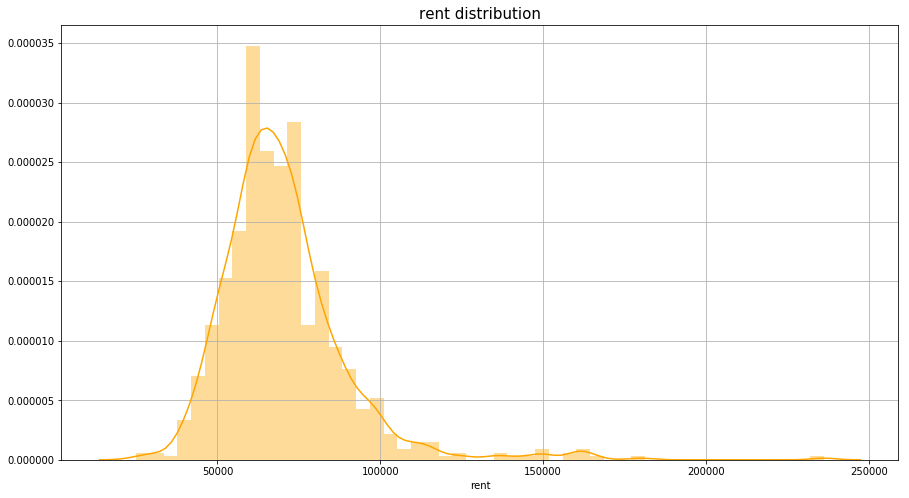

In [10]:
fig, axes = plt.subplots(figsize=(15,8))
sns.distplot(data["rent"], color='orange', ax=axes)
axes.set_title('rent distribution', fontsize=15)
axes.grid(True)
plt.show()

In [11]:
data[["is_second_floor", "rent"]].groupby(['is_second_floor'],
                                              as_index=False).mean().sort_values(by='rent', ascending=False)

,is_second_floor,rent
1,1,72579.918864
0,0,66154.911661


In [12]:
data[["have_air_conditioned", "rent"]].groupby(['have_air_conditioned'],
                                              as_index=False).mean().sort_values(by='rent', ascending=False)

,have_air_conditioned,rent
1,1,72423.689320
0,0,61682.911392


In [13]:
data[["have_storage", "rent"]].groupby(['have_storage'],
                                              as_index=False).mean().sort_values(by='rent', ascending=False)

,have_storage,rent
1,1,72141.986532
0,0,64018.681319


In [14]:
data[["have_flooring", "rent"]].groupby(['have_flooring'],
                                              as_index=False).mean().sort_values(by='rent', ascending=False)

,have_flooring,rent
1,1,75590.028818
0,0,65906.759907


In [15]:
data[["hava_balcony", "rent"]].groupby(['hava_balcony'],
                                              as_index=False).mean().sort_values(by='rent', ascending=False)

,hava_balcony,rent
1,1,72803
0,0,65023


In [16]:
data[["transfer_num", "rent"]].groupby(['transfer_num'],
                                              as_index=False).mean().sort_values(by='rent', ascending=False)

,transfer_num,rent
1,2,82802.127660
0,1,67498.925144
2,3,56268.656716


In [17]:
data[["from_express_train_num", "rent"]].groupby(['from_express_train_num'],
                                              as_index=False).mean().sort_values(by='rent', ascending=False)

,from_express_train_num,rent
6,6,76691.489362
0,0,73879.365079
4,4,72462.264151
5,5,72005.555556
3,3,68299.423077
1,1,65645.161290
2,2,62393.750000


外れ値控除

In [18]:
def outliers_by_IQR(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    col = (df[column] >= q1 - iqr) & (df[column] <= q3 + iqr)
    return df.loc[col]

In [19]:
data_otl = outliers_by_IQR(data, "rent")
print("sample number:\t\t", data_otl.shape[0])
print("variable number:\t", data_otl.shape[1])
print("outlier number:\t\t", data.shape[0]-data_otl.shape[0])

sample number:		 705
variable number:	 17
outlier number:		 71


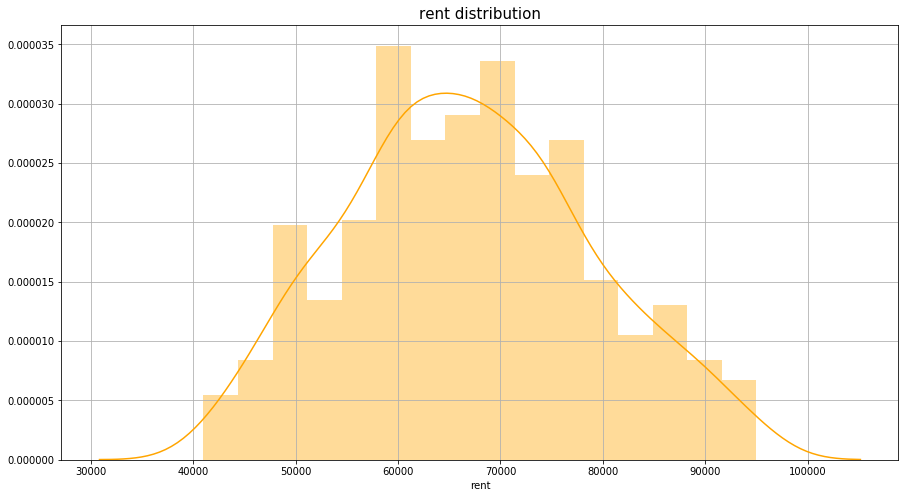

In [20]:
fig, axes = plt.subplots(figsize=(15,8))
sns.distplot(data_otl["rent"], color='orange', ax=axes)
axes.set_title('rent distribution', fontsize=15)
axes.grid(True)
plt.show()

# 回帰分析

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
fit_ols = smf.ols("np.log(rent) ~ exclusive_area + is_second_floor + distance_to_shinjyuku +"\
                  "have_air_conditioned + have_storage + have_flooring + hava_balcony", data=data_otl).fit()
print(fit_ols.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(rent)   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     166.5
Date:                Tue, 20 Nov 2018   Prob (F-statistic):          3.64e-144
Time:                        02:06:50   Log-Likelihood:                 544.52
No. Observations:                 705   AIC:                            -1073.
Df Residuals:                     697   BIC:                            -1037.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                10.81